# Homework 4
In this assignment, we will building a Naïve Bayes classifier and a SVM model for the productivity satisfaction of [the given dataset](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees), the productivity of garment employees.

## For Questions 1-3:
### Background 
The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. 

### Dataset Attribute Information

1. **date**: Date in MM-DD-YYYY
2. **day**: Day of the Week
3. **quarter** : A portion of the month. A month was divided into four quarters
4. **department** : Associated department with the instance
5. **team_no** : Associated team number with the instance
6. **no_of_workers** : Number of workers in each team
7. **no_of_style_change** : Number of changes in the style of a particular product
8. **targeted_productivity** : Targeted productivity set by the Authority for each team for each day.
9. **smv** : Standard Minute Value, it is the allocated time for a task
10. **wip** : Work in progress. Includes the number of unfinished items for products
11. **over_time** : Represents the amount of overtime by each team in minutes
12. **incentive** : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13. **idle_time** : The amount of time when the production was interrupted due to several reasons
14. **idle_men** : The number of workers who were idle due to production interruption
15. **actual_productivity** : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

#### Libraries that can be used: numpy, scipy, pandas, scikit-learn, cvxpy, imbalanced-learn
Any libraries used in the discussion materials are also allowed.

#### Other Notes

 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of this assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.

#### Trouble Shooting
In case you have trouble installing and using imbalanced-learn(imblearn) <br >
Run the below code cell, then go to the selection bar at top: Kernel > Restart. <br >
Then try `import imblearn` to see if things work. 


we are also working on a list of 1200 bitstrings, where each of them contains 16 bits. <br >
We will apply K-means Clustering, and PCA to this dataset for Q4-5. <br >

### Background and Data Information Q4-5
For a bitstring $S$ in this dataset, we describe $S = \{s_{15}, s_{14}, s_{13}, s_{12}, \ldots, s_{0} \}$, where $s_{15}$ is often known as the most significant bit (MSB) and $s_0$ as the least significant bit (LSB). <br >

There are duplicated bitstrings in this dataset, but they will not affect this assignment. Don't worry about them. <br >

## Equivalence Relation

**This is an important concept to Exercise 1.**

Let's say if we have two bitstrings, $A = \{a_{15}, a_{14}, a_{13}, \ldots, a_{0} \}$ and $B = \{b_{15}, b_{14}, b_{13}, \ldots, b_{0} \}$. <br >

We can flip one bit $a_i$ in $A$ to get another bitstring $A'$, such that the difference of $A$ and $A'$ is only one bit. We define the above transformation to be $A \to A'$. <br >


We call two bitstrings $A$ and $B$ to be **equivalent** ($A \sim B$) if there exists a sequence $A \to C_1 \to C_2 \to \cdots \to C_n \to B$, where $\forall i, C_i$ belongs to the dataset. 

It can be seen that equivalence is both __commutative__ ($A \sim B \iff B \sim A$) as well as __transitive__ ($A \sim B, B \sim C \implies A \sim C$). <br >

We can say that the elements in the above sequence $\{ A, C_1, \ldots, C_n, B\}$ form an equivalence class. Given a new bitstring $X$, we can see that if $X \sim C_i$, $1 \le i \le n$, then $X$ will be added to the above equivalence class, and by the transitive property of equivalence relations, $X \sim A$, and $X \sim B$.

### Example

Let's say we have 4 bitstrings, each of them is 4 bits long. They are $0000, 0010, 0110, 1100$, respectively.<br >

We can say $0000 \sim 0110$ because $0000 \to 0010 \to 0110$. <br >

However, $0000 \nsim 1100$. There may be sequences like $0000 \to 1000 \to 1100$ or $0000 \to 0100 \to 1100$, but neither $1000$ nor $0100$ is in our dataset. <br >

Ultimately, $\{0000, 0010, 0110\}$ form an equivalence class, whereas $\{1100\}$ is the other. As a result, there are two classes.

# Library Call

In [62]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from IPython.display import display # Just for solution

## Exercise 1 - General Data Preprocessing (10 points)

Our dataset needs cleaning before building any models. Some of the cleaning tasks are common in general, but depends on what kind of models we are building, sometimes we have to do additional processing. These additional tasks will be mentioned in each of the remaining two exercises later.

Note that **we will be using this processed data from exercise 1 in each of the remaining two exercises**.

For convenience, here are the attributes that we would treat them as **categorical attributes**: `day`, `quarter`, `department`, and `team`. 

 - Drop the column `date`.
 - For each of the categorical attributes, **print out** all the unique elements.
 - For each of the categorical attributes, remap the duplicated items, if you find there are typos or spaces among the duplicated items.
     - For example, "a" and "a " should be the same, so we need to update "a " to be "a".
     - Another example, "apple" and "appel" should be the same, so you should update "appel" to be "apple".
     

 - Create another column named `satisfied` that records the productivity performance. The behavior defined as follows. **This is the dependent variable we'd like to classify in this assignment.**
     - Return True or 1 if `actual_productivity` is equal to or greater than `targeted_productivity`. Otherwise, return False or 0, which means the team fails to meet the expected performance.
 - Drop the columns `actual_productivity` and `targeted_productivity`.


 - Find and **print out** which columns/attributes that have empty vaules, e.g., NA, NaN, null, None.
 - Fill the empty values with 0.

# Prepare Categorical Attributes

In [28]:
df = pd.read_csv('garments_worker_productivity.csv')
df = df.drop(columns=['date'])

categs = ['day', 'quarter', 'department']
for categ in categs:
    print(df[categ].unique()) 

print('Need to remap duplicated items!')

# Finishing error
df['department'] = df['department'].apply(lambda x: 'finishing' if x == 'finishing ' else x)
# Sewing error?
df['department'] = df['department'].apply(lambda x: 'sewing' if x == 'sweing' else x)

if precount == df['day'].count():
    print('instance count is the same after remapping!')

for categ in categs:
    print(df[categ].unique())
    
display(df.head(5))

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
['sweing' 'finishing ' 'finishing']
Need to remap duplicated items!
instance count is the same after remapping!
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
['sewing' 'finishing']


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Construct Dependent Variable 

In [29]:
df['satisfied'] = (df['targeted_productivity'] <= df['actual_productivity'])

df = df.drop(columns=['targeted_productivity', 'actual_productivity'])

display(df.head(15))

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,satisfied
0,Quarter1,sewing,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,True
1,Quarter1,finishing,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,True
2,Quarter1,sewing,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,True
3,Quarter1,sewing,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,True
4,Quarter1,sewing,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,True
5,Quarter1,sewing,Thursday,7,25.90,984.0,6720,38,0.0,0,0,56.0,True
6,Quarter1,finishing,Thursday,2,3.94,NaN,960,0,0.0,0,0,8.0,True
7,Quarter1,sewing,Thursday,3,28.08,795.0,6900,45,0.0,0,0,57.5,True
8,Quarter1,sewing,Thursday,2,19.87,733.0,6000,34,0.0,0,0,55.0,True
9,Quarter1,sewing,Thursday,1,28.08,681.0,6900,45,0.0,0,0,57.5,True


# Fill Null Elements

In [30]:
df = df.fillna(0)
print(df.shape)
display(df.head(15))

(1197, 13)


,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,satisfied
0,Quarter1,sewing,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,True
1,Quarter1,finishing,Thursday,1,3.94,0.0,960,0,0.0,0,0,8.0,True
2,Quarter1,sewing,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,True
3,Quarter1,sewing,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,True
4,Quarter1,sewing,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,True
5,Quarter1,sewing,Thursday,7,25.90,984.0,6720,38,0.0,0,0,56.0,True
6,Quarter1,finishing,Thursday,2,3.94,0.0,960,0,0.0,0,0,8.0,True
7,Quarter1,sewing,Thursday,3,28.08,795.0,6900,45,0.0,0,0,57.5,True
8,Quarter1,sewing,Thursday,2,19.87,733.0,6000,34,0.0,0,0,55.0,True
9,Quarter1,sewing,Thursday,1,28.08,681.0,6900,45,0.0,0,0,57.5,True


## Exercise 2 - Naïve Bayes Classifier (25 points in total)

### Exercise 2.1 - Additional Data Preprocessing (5 points)

To build a Naïve Bayes Classifier, we need to further encode our categorical variables.

 - For each of the **categorical attribtues**, encode the set of categories to be **0 ~ (n_classes - 1)**.
     - For example, \["paris", "paris", "tokyo", "amsterdam"\] should be encoded as \[1, 1, 2, 0\].
     - Note that the order does not really matter, i.e., \[0, 0, 1, 2\] also works. But you have to start with 0 in your encodings.
     - You can find information about this encoding in the discussion materials.


 - Split the data into training and testing set with the ratio of 80:20.

# Encode categorical attributes

In [63]:
df_nb = df.copy()
df_nb = pd.DataFrame(preprocessing.OrdinalEncoder().fit_transform(df_nb), columns=df_nb.columns)
# OrdinalEncoder will skip numerical values. LabelEncoder also works as they share the same functionality.
display(df_nb.head(15))

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,satisfied
0,0.0,1.0,3.0,7.0,41.0,328.0,101.0,37.0,0.0,0.0,0.0,57.0,1.0
1,0.0,0.0,3.0,0.0,2.0,0.0,9.0,0.0,0.0,0.0,0.0,5.0,1.0
2,0.0,1.0,3.0,10.0,9.0,247.0,44.0,20.0,0.0,0.0,0.0,25.0,1.0
3,0.0,1.0,3.0,11.0,9.0,247.0,44.0,20.0,0.0,0.0,0.0,25.0,1.0
4,0.0,1.0,3.0,5.0,40.0,367.0,20.0,20.0,0.0,0.0,0.0,51.0,1.0
5,0.0,1.0,3.0,6.0,40.0,254.0,93.0,14.0,0.0,0.0,0.0,51.0,1.0
6,0.0,0.0,3.0,1.0,2.0,0.0,9.0,0.0,0.0,0.0,0.0,5.0,1.0
7,0.0,1.0,3.0,2.0,47.0,161.0,96.0,17.0,0.0,0.0,0.0,54.0,1.0
8,0.0,1.0,3.0,1.0,22.0,134.0,81.0,11.0,0.0,0.0,0.0,49.0,1.0
9,0.0,1.0,3.0,0.0,47.0,116.0,96.0,17.0,0.0,0.0,0.0,54.0,1.0


# Split into train and test

In [32]:
nb_train, nb_test = train_test_split(df_nb, test_size=0.2)
X_nb_train, y_nb_train = nb_train.drop(columns=['satisfied']), nb_train['satisfied']
X_nb_test, y_nb_test = nb_test.drop(columns=['satisfied']), nb_test['satisfied']
print(X_nb_train.shape, X_nb_test.shape)

(957, 12) (240, 12)


### Exercise 2.2 - Naïve Bayes Classifier for Categorical Attributes (10 points)

Use the categorical attributes **only**, please build a Categorical Naïve Bayes classifier that predicts the column `satisfied`. <br >
Report the **testing result** using `classification_report`.

In [70]:
clf_cat = CategoricalNB()

# Create train, test with only categoricals
train, test = train_test_split(df, test_size=0.2)

cat_train = train.select_dtypes(include=['object'])
display(cat_train.head(5), cat_train.shape)

cat_test = test.select_dtypes(include=['object'])
display(cat_test.head(5), cat_test.shape)

# Encode categorical train, test numerically
encoder = preprocessing.OrdinalEncoder()

cat_train = pd.DataFrame(encoder.fit_transform(cat_train), columns=cat_train.columns)
display(cat_train.head(5), cat_train.shape)

cat_test = pd.DataFrame(encoder.transform(cat_test), columns=cat_test.columns)
display(cat_test.head(5), cat_test.shape)

# Load values
X_train, Y_train = cat_train, train['satisfied']
X_test, Y_test = cat_test, test['satisfied']

# Train the classifier on the categorical features in the training set
clf_cat.fit(X_train, Y_train)

# Predictions, only categorical
Y_pred = clf_cat.predict(X_test)

# Evaluate
report = classification_report(Y_test, Y_pred)
print('classification report: \n', report)




,quarter,department,day
507,Quarter5,finishing,Thursday
726,Quarter2,sewing,Wednesday
629,Quarter1,finishing,Thursday
521,Quarter5,finishing,Saturday
111,Quarter1,finishing,Wednesday


(957, 3)

,quarter,department,day
12,Quarter1,sewing,Thursday
728,Quarter2,sewing,Wednesday
534,Quarter5,sewing,Saturday
548,Quarter1,finishing,Sunday
971,Quarter4,sewing,Saturday


(240, 3)

,quarter,department,day
0,4.0,0.0,3.0
1,1.0,1.0,5.0
2,0.0,0.0,3.0
3,4.0,0.0,1.0
4,0.0,0.0,5.0


(957, 3)

,quarter,department,day
0,0.0,1.0,3.0
1,1.0,1.0,5.0
2,4.0,1.0,1.0
3,0.0,0.0,2.0
4,3.0,1.0,1.0


(240, 3)

final values to fit to Naive Bayes...


,quarter,department,day
0,4.0,0.0,3.0
1,1.0,1.0,5.0
2,0.0,0.0,3.0
3,4.0,0.0,1.0
4,0.0,0.0,5.0


(957, 3)

classification report: 
               precision    recall  f1-score   support

       False       0.50      0.08      0.14        59
        True       0.77      0.97      0.86       181

    accuracy                           0.75       240
   macro avg       0.63      0.53      0.50       240
weighted avg       0.70      0.75      0.68       240



### Exercise 2.3 - Naïve Bayes Classifier for Numerical Attributes (10 points)

Use the numerical attributes **only**, please build a Gaussian Naïve Bayes classifier that predicts the column `satisfied`. <br >
Report the **testing result** using `classification_report`.

**Remember to scale your data. The scaling method is up to you.**

In [77]:
cats = ['quarter', 'department', 'day']
nums = [col for col in X_nb_train.columns if col not in cats]

clf_num = GaussianNB()
scaler = preprocessing.StandardScaler()
scaler.fit(X_nb_train[nums])

Z_nb_train = scaler.transform(X_nb_train[nums])
Z_nb_test = scaler.transform(X_nb_test[nums])


clf_num.fit(Z_nb_train, np.asarray(y_nb_train))

print(classification_report(y_nb_test, clf_num.predict(Z_nb_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.04      0.08        68
         1.0       0.73      1.00      0.84       172

    accuracy                           0.73       240
   macro avg       0.86      0.52      0.46       240
weighted avg       0.80      0.73      0.63       240



## Exercies 3 - SVM Classifier (30 points in total)

### Exercise 3.1 - Additional Data Preprocessing (5 points)

To build a SVM Classifier, we need a different encoding for our categorical variables.

 - For each of the **categorical attribtues**, encode them with **one-hot encoding**.
     - You can find information about this encoding in the discussion materials.


 - Split the data into training and testing set with the ratio of 80:20.

# One-Hot Encode Categorical Variables

In [81]:
# Sklearn solution
nums = [col for col in df.drop(columns=['satisfied']).columns if col not in cats]

df_svm = df.copy()

df_svm = pd.get_dummies(df_svm, columns=cats)
df_svm = df_svm.astype(int)

print(df_svm)

      team  smv   wip  over_time  incentive  idle_time  idle_men  \
0        8   26  1108       7080         98          0         0   
1        1    3     0        960          0          0         0   
2       11   11   968       3660         50          0         0   
3       12   11   968       3660         50          0         0   
4        6   25  1170       1920         50          0         0   
...    ...  ...   ...        ...        ...        ...       ...   
1192    10    2     0        960          0          0         0   
1193     8    3     0        960          0          0         0   
1194     7    3     0        960          0          0         0   
1195     9    2     0       1800          0          0         0   
1196     6    2     0        720          0          0         0   

      no_of_style_change  no_of_workers  satisfied  ...  quarter_Quarter4  \
0                      0             59          1  ...                 0   
1                      0     

# Split Dataset

In [80]:
svm_train, svm_test = train_test_split(df_svm, test_size=0.2)
X_svm_train, y_svm_train = svm_train.drop(columns=['satisfied']), svm_train['satisfied']
X_svm_test, y_svm_test = svm_test.drop(columns=['satisfied']), svm_test['satisfied']

### Exercise 3.2 - SVM with Different Kernels (15 points)

Using all the attributes we have, please build a SVM that predicts the column `satisfied`. <br >
Specifically, please 
 - Build one SVM with **linear kernel**.
 - Build another SVM but with **rbf kernel**.
 - Report the **testing results** of **both models** using `classification report`.

The kernel is the only setting requirement. <br >
Other hyperparameter tuning is not required. But make sure they are the same in these two SVMs if you'd like to tune the model. In other words, the only difference between the two SVMs should be the kernel setting.

**Remember to scale your data. The scaling method is up to you.**

# Linear Kernel SVM

In [82]:
svc_li = SVC(kernel='linear')

scaler = preprocessing.StandardScaler()
scaler.fit(X_svm_train)

Z_svm_train = scaler.transform(X_svm_train)
Z_svm_test = scaler.transform(X_svm_test)

svc_li.fit(Z_svm_train, np.asarray(y_svm_train))

print('Linear Kernel')
print(classification_report(y_svm_test, svc_li.predict(Z_svm_test)))

Linear Kernel
              precision    recall  f1-score   support

           0       0.50      0.02      0.03        59
           1       0.76      0.99      0.86       181

    accuracy                           0.75       240
   macro avg       0.63      0.51      0.45       240
weighted avg       0.69      0.75      0.66       240



# RBF Kernel SVM

In [83]:
svc_rbf = SVC(kernel='rbf')

scaler = preprocessing.StandardScaler()
scaler.fit(X_svm_train)

Z_svm_train = scaler.transform(X_svm_train)
Z_svm_test = scaler.transform(X_svm_test)

svc_rbf.fit(Z_svm_train, np.asarray(y_svm_train))

print('RBF Kernel')
print(classification_report(y_svm_test, svc_rbf.predict(Z_svm_test)))

RBF Kernel
              precision    recall  f1-score   support

           0       0.48      0.17      0.25        59
           1       0.78      0.94      0.85       181

    accuracy                           0.75       240
   macro avg       0.63      0.55      0.55       240
weighted avg       0.70      0.75      0.70       240



### Exercise 3.3 - SVM with Over-sampling (10 points)
 - For the column `satisfied` in our **training set**, please **print out** the frequency of each class. 
 - Oversample the **training data**. 
 - For the column `satisfied` in the oversampled data, **print out** the frequency of each class  again.
 - Re-build the 2 SVMs with the same setting you have in Exercise 3.2, but **use oversampled training data** instead.
     - Do not forget to scale the data first. As always, the scaling method is up to you.
 - Report the **testing result** with `classification_report`.

You can use ANY methods listed on [here](https://imbalanced-learn.org/stable/references/over_sampling.html#) such as RandomOverSampler or SMOTE. <br > 
You are definitely welcomed to build your own oversampler. <br >

Note that you do not have to over-sample your testing data.

In [90]:
print('Frequency of Classes in Training set:\n', y_svm_train.value_counts())

ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(X_svm_train, y_svm_train)

print('Frequency of Classes in Oversampled Training set:\n', y_os.value_counts())

Frequency of Classes in Training set:
 satisfied
1    694
0    263
Name: count, dtype: int64
Frequency of Classes in Oversampled Training set:
 satisfied
1    694
0    694
Name: count, dtype: int64


# Linear Kernel SVM - Oversampled Trainset

In [93]:
svc_li = SVC(kernel='linear')

scaler = preprocessing.StandardScaler()
scaler.fit(X_os)

Z_svm_train = scaler.transform(X_os)
Z_svm_test = scaler.transform(X_svm_test)

svc_li.fit(Z_svm_train, np.asarray(y_os))

print('Linear Kernel w/ Oversampled Trainset')
print(classification_report(y_svm_test, svc_li.predict(Z_svm_test)))

Linear Kernel w/ Oversampled Trainset
              precision    recall  f1-score   support

           0       0.39      0.76      0.52        59
           1       0.89      0.61      0.73       181

    accuracy                           0.65       240
   macro avg       0.64      0.69      0.62       240
weighted avg       0.77      0.65      0.67       240



# RBF Kernel SVM - Oversampled Trainset

In [94]:
svc_rbf = SVC(kernel='rbf')

scaler = preprocessing.StandardScaler()
scaler.fit(X_os)

Z_svm_train = scaler.transform(X_os)
Z_svm_test = scaler.transform(X_svm_test)

svc_rbf.fit(Z_svm_train, np.asarray(y_os))

print('RBF Kernel w/ Oversampled Trainset')
print(classification_report(y_svm_test, svc_rbf.predict(Z_svm_test)))

RBF Kernel w/ Oversampled Trainset
              precision    recall  f1-score   support

           0       0.45      0.69      0.55        59
           1       0.88      0.72      0.79       181

    accuracy                           0.72       240
   macro avg       0.66      0.71      0.67       240
weighted avg       0.77      0.72      0.73       240



## Exercise 4 - K-Means Clustering (15 points in total)
Let's see how k-means behave differently from agglomerative clustering.

### Exercise 4.1 - K-Means Clustering for Equivalence Classes (10 points)
 - Cluster the dataset with k-means, but with the number 60.
 - Show the frequency(number of members) of each cluster. Again, you are encouraged to create a bar chart, but printing the numbers is also fine.


/home/hawkobo/anaconda3/envs/jupyterlab-debugger/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


class
31    68
13    68
56    56
8     48
55    42
37    41
21    41
3     39
48    37
10    37
57    35
18    33
40    28
35    24
23    23
20    21
5     19
15    18
41    18
28    18
16    17
46    16
58    16
54    16
59    16
11    16
2     15
34    15
53    15
17    15
44    15
19    15
52    14
22    14
4     13
39    13
14    13
38    13
50    13
1     13
0     13
6     12
36    12
43    12
26    11
24    11
47    11
27    11
33    10
49    10
25    10
30    10
32     9
42     9
12     9
9      8
7      8
29     8
45     7
51     2
Name: count, dtype: int64


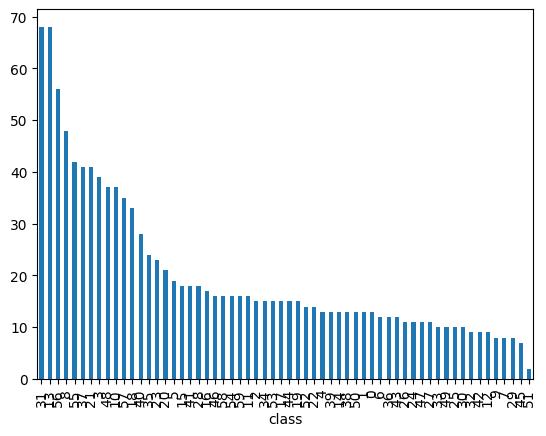

In [95]:
from sklearn.cluster import KMeans

df = pd.read_csv("bitstrings.csv")

kmeans = KMeans(n_clusters=60)
kmeans_result = kmeans.fit(np.asarray(df))

kmeans_clustering = pd.Series(kmeans_result.labels_, name='class')
kmeans_distribution = kmeans_clustering.value_counts()

print(kmeans_distribution)

_ = kmeans_distribution.plot(kind='bar')

### Exercise 4.2 - Difference between Agglomerative Clustering and K-Means Clustering (5 points)

Explain
- What are the difference Agglomerative Clustering and K-Means Clustering
- Why there is such a difference

K-means clustering is intended to take any distribution of data (of any dimensionality) and group it into K categories, as a function of similarity (which is in turn a function of distance). It is clusterized based on the means of the data-points, for the given cluster; note this is subject to change, as it will update as more data point members are added via distance calculations.

Agglomerative clustering, on the other hand, does not have K clusters specified. It begins with individual data points, and merges them into larger clusters. The method is said to be hierarchical: that is, it generates a dendrogram for the clusterization. This is visualization that reflects the recursive operations: two datapoints, if a sufficient distance away (determined by some agglomerate threshold), will belong to the same cluster. This is precisely why it starts with a single datapoint: the thresholded dendrogram allows datapoints to be grouped together, a single datapoint at a time.

Choosing between the two clustering algorithms depends on the particularities of the data. K-means is simpler and more efficient, whereas Agglomerative clustering is flexible and can handle complex cluster structures. K-means creates spherical clusters; the Agglomerative's dendrograms are decidedly more complex and interpretable. 

It also depends on one more thing, and lends insight into the difference between these two: Agglomerative Clustering does not have clear, defined membership like K-Means clustering. Agglomerative Clustering's dendrogramming allows for a spectrum of complexity: it is about the relationships BETWEEN pairs of datapoints, or pairs of groups of datapoints. Depending on what you want to look at, Agglomerative Clustering can tell you the relationships between two single points, between two clusters of datapoints, or between two megaclusters of datapoints (many clusters!). This is very powerful, and is a well of insight which K-means is distinctly lacking. K-means only gives you insight between clusters; there is not really a way to further partition these clusters, or assign membership to some "class of clusters". This is something that dendrograms do.

So to summarize: The reason there is a difference between the two clustering algorithms is because K-means clustering offers relational insight between individual clusters, but agglomerative clustering offers insight between virtually any pairable representation in the dataset (via the dendrogram)

## Exercise 5 - Principal Component Analysis (20 points in total)

We can visualize how the bitstrings are distributed using principal component analysis.

### Exercise 5.1 - Generate 2 Clusters (5 points)

 - Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
 - Show the frequency(number of members) of each cluster.

class
2    417
0    393
1    390
Name: count, dtype: int64


/home/hawkobo/anaconda3/envs/jupyterlab-debugger/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


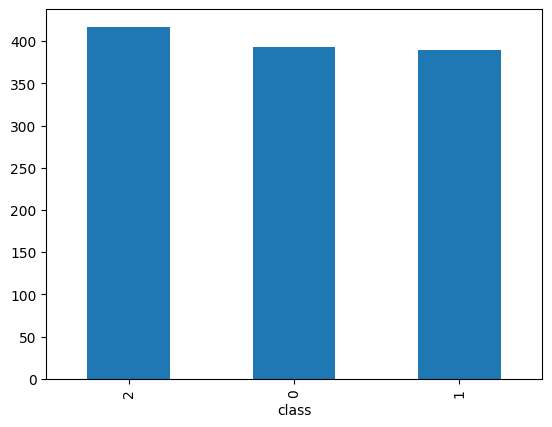

In [130]:
kmeans = KMeans(n_clusters=2)
kmeans_result = kmeans.fit(np.asarray(df))

kmeans_clustering = pd.Series(kmeans_result.labels_, name='class')
kmeans_distribution = kmeans_clustering.value_counts()

print(kmeans_distribution)

_ = kmeans_distribution.plot(kind='bar')

### Exercise 5.2 - PCA for Feature Extraction (15 points)

 - Retrieve the projected dataset with PCA, using ```n_components=2```.
 - Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster in Exercise 3.1.
 - In the first principal component, **print out** the weights of all features.
 - Report which feature has the **highest positive** weight in the first principal component.

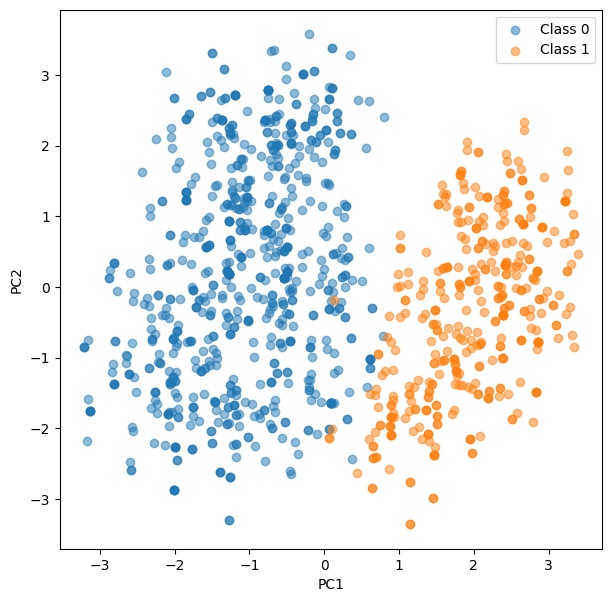

 cluster 1 PC1 weights: [-1.26773108 -1.84915294 -1.02921553 -1.84915294 -2.32375525 -2.33656557
 -2.31358543 -2.63032921 -2.01249657 -1.43107472]
 shape: (784,)
 cluster 2 PC1 weights: [2.86191611 2.05328914 2.09526146 1.92733968 1.46461849 1.76570735
 1.56737638 1.30067772 1.8019223  2.51601033]
 shape: (416,)
 all PC1 weights (first 10): [-1.26773108 -1.84915294 -1.02921553 -1.84915294 -2.32375525 -2.33656557
 -2.31358543 -2.63032921 -2.01249657 -1.43107472]
 shape: (1200,)
 Highest positive weight for first principle component:  3.3874927405073585


In [133]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(np.asarray(df))
Z_pca = pca.fit_transform(X)

plt.figure(figsize=(7,7))
plt.scatter(Z_pca[(result.labels_ == 0), 0], Z_pca[(result.labels_ == 0), 1], alpha=0.5, c='tab:blue', label='Class 0')
plt.scatter(Z_pca[(result.labels_ == 1), 0], Z_pca[(result.labels_ == 1), 1], alpha=0.5, c='tab:orange', label='Class 1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Weights in PC1. Concatenate
class1_weightPC1 = Z_pca[(result.labels_ == 0), 0]
print(f' cluster 1 PC1 weights: {class1_weightPC1[0:10]}\n shape: {class1_weightPC1.shape}')

class2_weightPC1 = Z_pca[(result.labels_ == 1), 0]
print(f' cluster 2 PC1 weights: {class2_weightPC1[0:10]}\n shape: {class2_weightPC1.shape}')

weightsPC1 = np.concatenate((class1_weightPC1, class2_weightPC1))
print(f' all PC1 weights (first 10): {weightsPC1[0:10]}\n shape: {weightsPC1.shape}')

# Feature with heighest positive weight in PC1
print(f' Highest positive weight for first principle component: ', max(weightsPC1))